In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# GENERATE LATITUDES AND LONGITUDES
    # first, they need to be stored so that we can access them later. 
    # Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
    # To ensure enough latitudes and longitudes, we'll start with 1,500. 
        # In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# ZIP OBJECT
    # The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
    # If there are 1,500 latitudes and longitudes, 
        # there will be 1,500 tuples of paired latitudes and longitudes, 
            # where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

# Create a practice set of random latitude and longitude combinations.
    # lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
    # lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
    # lat_lngs = zip(lats, lngs)          
            
# Let's unpack our lat_lngs zip object into a list. 
    # This way, we only need to create a set of random latitudes and longitudes onc

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# NOTE
    # You can only unzip a zipped tuple once before it is removed from the computer's memory. 
    # Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.847319194663456 143.37798756530492
-11.056065875123082 103.8890327198676
73.18662646101879 159.9584711465298
59.76045165836487 23.688901853997663
55.46077605510007 34.23051143033743
-48.06911000601358 -67.74932998741
-80.42710851409414 34.127412704943424
-80.07438237210874 -136.9380037948012
-37.13703574641406 34.14479291820592
-52.857301866544375 -167.31764056078106
58.14005326983343 -54.749554873313016
34.51524409280802 176.7291274823677
-72.33466737840685 -93.95659249344816
45.82867244406421 -70.03872392011277
-83.51328922235476 58.215552599230335
11.413271543444722 68.72870428880606
76.83345314395154 -136.01822386877055
19.173776689137185 -145.1161690897015
78.5510109779784 -51.90026984950637
84.09521340736927 -55.161213276840414
5.050624078657108 -114.3926779104973
-40.431628373750875 38.49552296143111
-52.73053130810965 -55.00347061593513
59.94822037383571 -112.70247946729891
-54.17583550665943 -47.581025047104475
32.98650885446432 -126.9154282798674
88.31369916541675 93.46375

In [8]:
# Now that we have our ordered pairs of latitudes and longitudes in a list
    # we can iterate through the list of tuples and find the nearest city to those coordinates

In [9]:
# To activate the PythonData environment on the command line
    # type conda activate PythonData.

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [12]:
# CODE BREAKDOWN
    # We create a cities list to store city names.
    # We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
    # We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. 
        # If not, then we'll use the append() function to add it. 
        # We are doing this because among the 1,500 latitudes and longitudes, 
            # there might be duplicates, which will retrieve duplicate cities, 
            # and we want to be sure we capture only the unique cities.

In [13]:
# Note
    # The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
    # When you run the code block, you should get slightly more than 500 unique cities. 
        # If you get fewer than 500, increase your size limit on the np.random.uniform() function.

In [14]:
import requests
from config import weather_api_key

In [15]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2a691d9bfeae144a705c053319fcf96"

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# In the code block, we have initialized the counters at 1 
    # because we want the first iteration of the logging for each recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


In [18]:
# LOOP THROUGH THE LIST OF CITIES AND BUILD THE CITY URL
    # Next, we need to iterate through our list of cities and begin building the URL for each city, 
        # while grouping our records in sets of 50. 
    # To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
    # Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. 
    # The OpenWeatherMap API only allows 60 calls for per minute on their free tier, 
        # so pausing our program for one minute after each set of 50 will prevent time-out errors. 
    # We can also retrieve the city from the cities list and add it to the city_url by using indexing

In [19]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
       # set_count += 1
       # record_count = 1
       # time.sleep(60)

    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]

In [20]:
# Every time we want to reference the city in our code, we need to use the indexing on the cities list. 
  # Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. 
    # To fix this issue, we need to create another for loop to get the city from the cities list.
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list

# for i, item in enumerate(list):

In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | shimoda
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | tammisaari
Processing Record 5 of Set 1 | novodugino
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | liniere
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 39 of Set 4 | sigerfjord
City not found. Skipping...
Processing Record 40 of Set 4 | awjilah
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | puerto del rosario
Processing Record 43 of Set 4 | boyuibe
Processing Record 44 of Set 4 | georgiyevka
Processing Record 45 of Set 4 | follebu
Processing Record 46 of Set 4 | maceio
Processing Record 47 of Set 4 | eureka
Processing Record 48 of Set 4 | chagda
City not found. Skipping...
Processing Record 49 of Set 4 | jagtial
Processing Record 50 of Set 4 | san policarpo
Processing Record 1 of Set 5 | hoquiam
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | sheoganj
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | mtsamboro
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | chimbote
Processing Record 9 of Set 5 | houston
Processing Record 10 of Set 5 | san

Processing Record 26 of Set 8 | krasnystaw
Processing Record 27 of Set 8 | shelburne
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | riyadh
Processing Record 30 of Set 8 | zarubino
Processing Record 31 of Set 8 | hwange
Processing Record 32 of Set 8 | nouakchott
Processing Record 33 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | kutum
Processing Record 36 of Set 8 | rengo
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | fort abbas
Processing Record 39 of Set 8 | blackwater
Processing Record 40 of Set 8 | tarko-sale
Processing Record 41 of Set 8 | visby
Processing Record 42 of Set 8 | sao pedro do piaui
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | okhotsk
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Processing Record 47 of Set 8 | katobu
Processing Record 48 of Set 8

Processing Record 16 of Set 12 | betare oya
Processing Record 17 of Set 12 | isetskoye
Processing Record 18 of Set 12 | mackay
Processing Record 19 of Set 12 | srednekolymsk
Processing Record 20 of Set 12 | sangar
Processing Record 21 of Set 12 | sakaiminato
Processing Record 22 of Set 12 | wawa
Processing Record 23 of Set 12 | shubarshi
Processing Record 24 of Set 12 | yangjiang
Processing Record 25 of Set 12 | puerto ayacucho
Processing Record 26 of Set 12 | urumqi
Processing Record 27 of Set 12 | lazaro cardenas
Processing Record 28 of Set 12 | neuquen
Processing Record 29 of Set 12 | el cobre
Processing Record 30 of Set 12 | nanakuli
Processing Record 31 of Set 12 | maragogi
Processing Record 32 of Set 12 | mizdah
Processing Record 33 of Set 12 | aluksne
Processing Record 34 of Set 12 | santa fe springs
Processing Record 35 of Set 12 | aden
Processing Record 36 of Set 12 | golden
Processing Record 37 of Set 12 | kananga
Processing Record 38 of Set 12 | usinsk
Processing Record 39 o

In [22]:
# CODE BREAKDOWN

# We create the for loop with the enumerate() method and reference the index and the city in the list.
    # In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
        # If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. 
    # However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
        # This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
    # Then we add one to the record count before the next city is processed.
    # Next, we will retrieve the data from the JSON weather response for each city.

# NOTE
    # When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse. 
    # If not, the script might stop at that moment and not finish getting all the data we need.

In [23]:
# HANDLE API REQUEST ERRORS WITH TRY-EXCEPT BLOCKS

    # We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request isn't a valid response. 
    # If the request isn't valid, the code will not find the first item requested, 
        # which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.
    # The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:
        # try:
            # Do something
        # except:
            # print("An exception occurred")


In [24]:
# CREATE A DATAFRAME OF CITY WEATHER DATA
    # convert a list of dictionaries to a Pandas DataFrame using
        # df = pd.DataFrame(list with dictionaries)

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shimoda,34.6667,138.9500,52.16,58,12,8.14,JP,2022-12-30 06:54:51
1,Cherskiy,68.7500,161.3000,-44.63,100,87,3.67,RU,2022-12-30 06:54:52
2,Tammisaari,59.9736,23.4339,40.28,99,100,13.91,FI,2022-12-30 06:54:52
3,Novodugino,55.6305,34.2842,32.67,99,100,9.26,RU,2022-12-30 06:54:53
4,Comodoro Rivadavia,-45.8667,-67.5000,62.46,34,0,13.80,AR,2022-12-30 06:54:53
5,Port Elizabeth,-33.9180,25.5701,70.11,63,40,7.00,ZA,2022-12-30 06:54:54
6,Rikitea,-23.1203,-134.9692,77.56,73,75,4.79,PF,2022-12-30 06:54:24
7,Avarua,-21.2078,-159.7750,78.85,83,75,2.30,CK,2022-12-30 06:54:55
8,Paamiut,61.9940,-49.6678,10.81,79,7,12.35,GL,2022-12-30 06:54:55
9,Nikolskoye,59.7035,30.7861,30.09,96,100,8.50,RU,2022-12-30 06:54:56


In [51]:
# Reorder the columns
    # Assign a variable to an array of the columns in the order we want them to appear
        #new_column_order = ["column2", "column4", "column1"]
    # Assign a new or same dataframe with new column order
        # df = df[new_column_order]

In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = pd.DataFrame(city_data)[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimoda,JP,2022-12-30 06:54:51,34.6667,138.9500,52.16,58,12,8.14
1,Cherskiy,RU,2022-12-30 06:54:52,68.7500,161.3000,-44.63,100,87,3.67
2,Tammisaari,FI,2022-12-30 06:54:52,59.9736,23.4339,40.28,99,100,13.91
3,Novodugino,RU,2022-12-30 06:54:53,55.6305,34.2842,32.67,99,100,9.26
4,Comodoro Rivadavia,AR,2022-12-30 06:54:53,-45.8667,-67.5000,62.46,34,0,13.80
5,Port Elizabeth,ZA,2022-12-30 06:54:54,-33.9180,25.5701,70.11,63,40,7.00
6,Rikitea,PF,2022-12-30 06:54:24,-23.1203,-134.9692,77.56,73,75,4.79
7,Avarua,CK,2022-12-30 06:54:55,-21.2078,-159.7750,78.85,83,75,2.30
8,Paamiut,GL,2022-12-30 06:54:55,61.9940,-49.6678,10.81,79,7,12.35
9,Nikolskoye,RU,2022-12-30 06:54:56,59.7035,30.7861,30.09,96,100,8.50


In [53]:
# Create the output file (CSV).
output_data_file = "World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [54]:
# Plot Latitude vs. Temperature
    # to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().
# Get Data for Plotting
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [55]:
# Your final scatter plot will need the current date in the title. 
    # To add the current date, we will need to import the time module, rather than the datetime module that we used to convert the date. 
    # The time module is a standard Python library, so there is no need to install it.

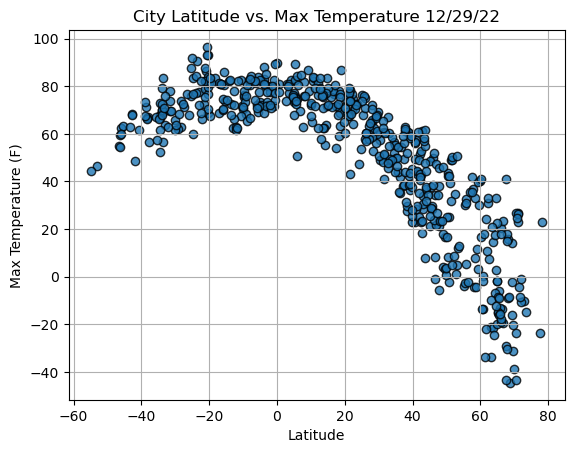

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

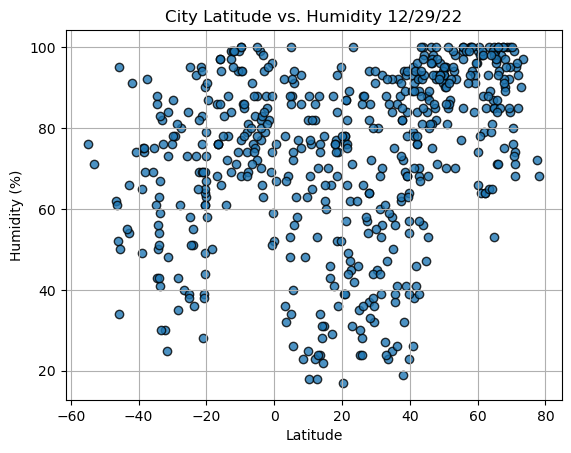

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

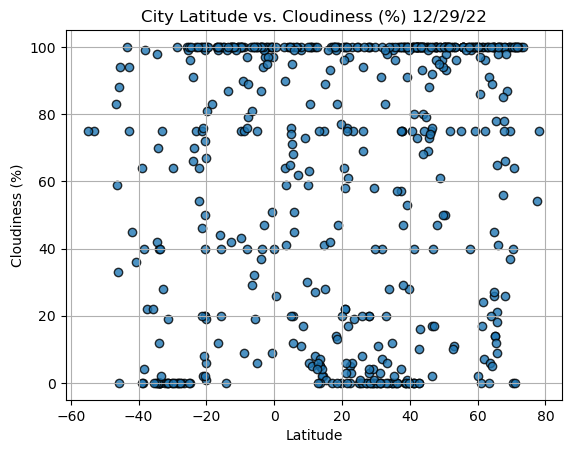

In [58]:
#Refactoring the code for the scater plots 
    # by changing the y-axis variable to "cloudiness," 
    # the title to "Cloudiness (%)," 
    # and the y-axis label to "Cloudiness (%)."
    
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

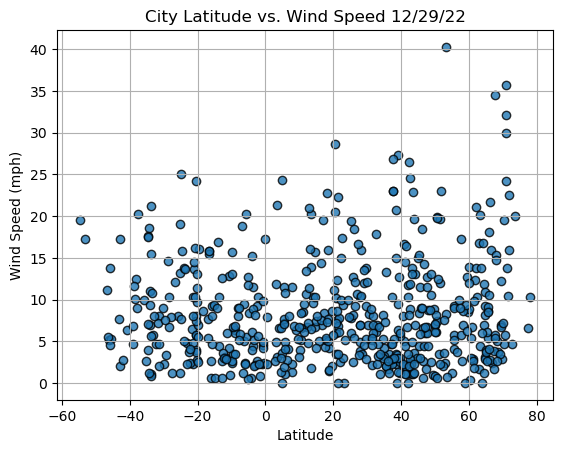

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()

In [60]:
# LINEAR REGRESSION
    # Linear regression is used to find a relationship between a dependent variable and one or more independent variables. 
    # The trick is to find something (a dependent variable) that depends on something else (the independent variable) and plot that relationship
        # Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 
        # Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable
    # To determine if maximum temperature correlates to latitude, we can plot a linear regression line, a straight trendline predicting the average y-value, or dependent variable, for a given x-value, or independent variable. 
        # This line can be plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. 
        # For every x-value, or latitude we use in the equation, we will get a predicted temperature value.
    # To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. 
        # A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. 
        # A correlation coefficient close to zero is no correlation.

In [61]:
# CREATE A LINEAR REGRESSION FUNCTION

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
# CREATE THE HEMISPHERE DATAFRAMES
    # We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
        # To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.
    # To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. 
        # The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
        # The syntax to get a specific row from a current DataFrame is 
            # row = df.loc[row_index].
    # Let's apply this method to our city_data_df DataFrame by adding the code 
        # index13 = city_data_df.loc[13] in a cell and running the cell. 
        # The output will present all the information at index 13 of the city_data_df DataFrame. 
        # Note that you may see a different city in your output cell than the one shown in the following image

In [63]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2022-12-30 06:54:58
Lat                       69.4541
Lng                     -133.0374
Max Temp                     -2.2
Humidity                       84
Cloudiness                     75
Wind Speed                   6.91
Name: 13, dtype: object

In [64]:
city_data_df["Lat"]>= 0

0       True
1       True
2       True
3       True
4      False
       ...  
549     True
550     True
551    False
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimoda,JP,2022-12-30 06:54:51,34.6667,138.9500,52.16,58,12,8.14
1,Cherskiy,RU,2022-12-30 06:54:52,68.7500,161.3000,-44.63,100,87,3.67
2,Tammisaari,FI,2022-12-30 06:54:52,59.9736,23.4339,40.28,99,100,13.91
3,Novodugino,RU,2022-12-30 06:54:53,55.6305,34.2842,32.67,99,100,9.26
8,Paamiut,GL,2022-12-30 06:54:55,61.9940,-49.6678,10.81,79,7,12.35


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
    # To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
    # Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.
    # Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. 
    # Add the code to a new cell and run it to generate the linear regression and plot the data.
    
# NOTE
    # If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see the equation.

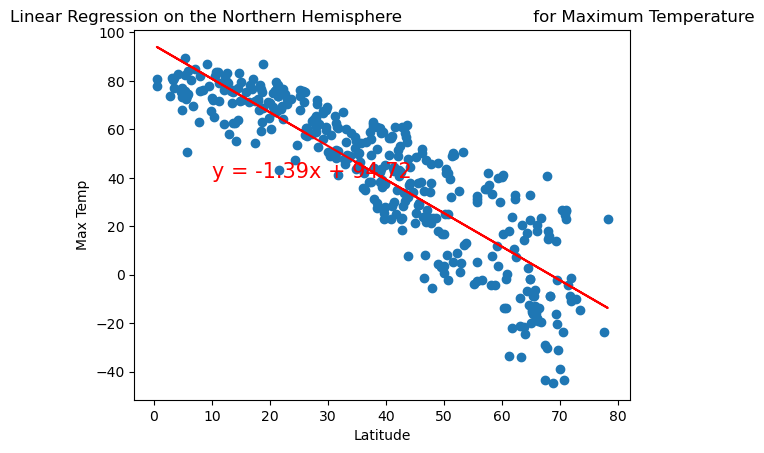

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
    # To generate the linear regression on the maximum temperature for the Southern Hemisphere, 
        # reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.
    # Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot

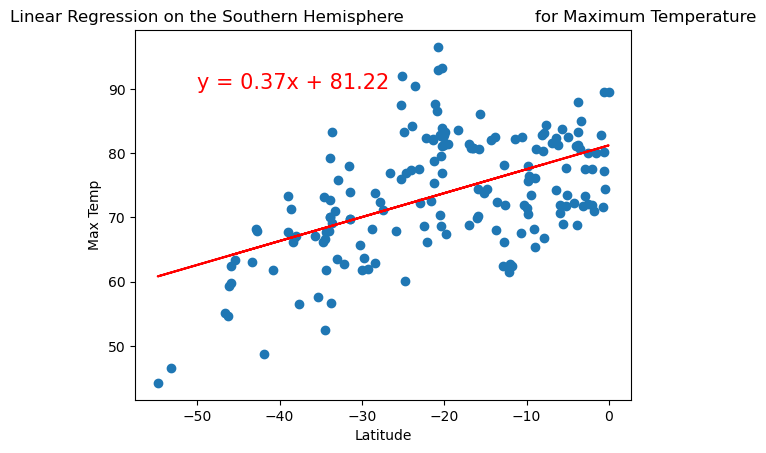

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [ ]:
# FINDING
    # The correlation between the latitude and the maximum temperature is strong to very strong because 
        # the r-value is less than –0.7 for the Northern Hemisphere 
        # and greater than 0.7 for the Southern Hemisphere, 
        # as shown by the plots here. 
            # This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
            # And when we are further from the equator the temperatures become cooler. 
            # Check the r-values for your plots. 

In [ ]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
    # To perform the linear regression on the percent humidity for the Northern Hemisphere, 
        # set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.
    # Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

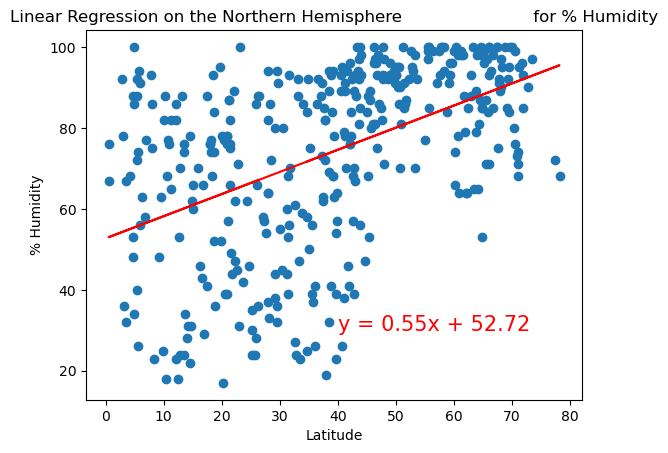

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

In [80]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
    # Latitude is the independent variable 
    # Humidity is the dependent variable
# For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.
# Call the plot_linear_regression function, with the x-and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

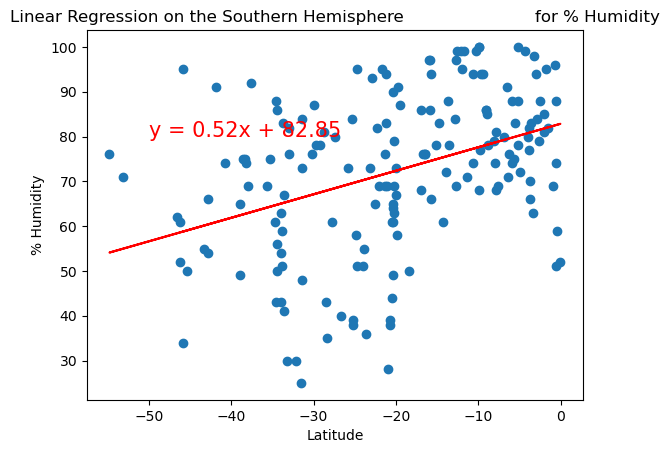

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,80))

In [82]:
# FINDING
    # The correlation between the latitude and percent humidity is very low because 
        # the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. 
        # This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
        # Check the r-values for your plots. 

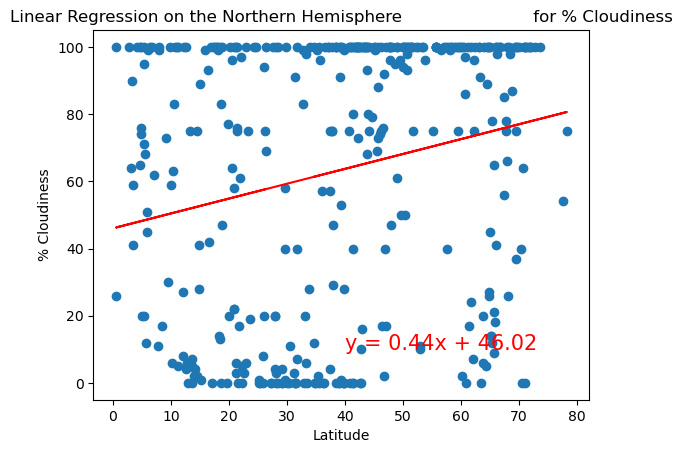

In [83]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

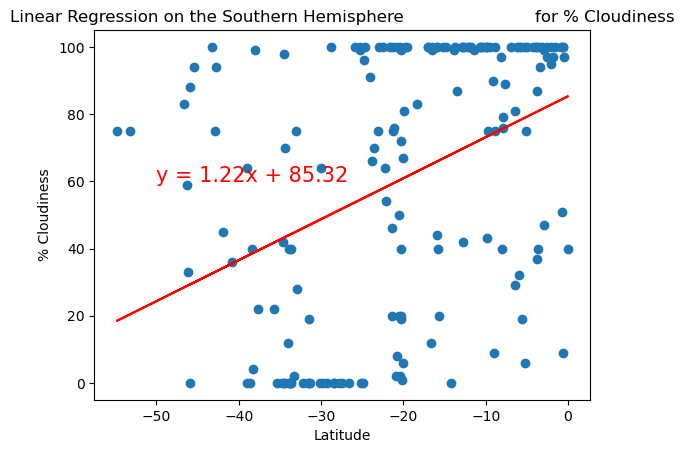

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# FINDING
    # The correlation between the latitude and percent cloudiness is 
        # very low because the r-value is less than –0.09 for the Northern Hemisphere 
        # and less than –0.02 for the Southern Hemisphere for the plots shown here. 
    # This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
    # Check the r-values for your plots. 

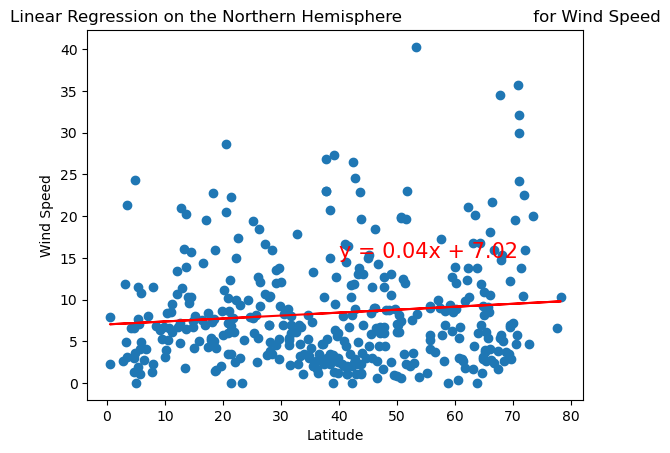

In [89]:
# Linear regression on the Northern Hemisphere (WIND SPEED)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

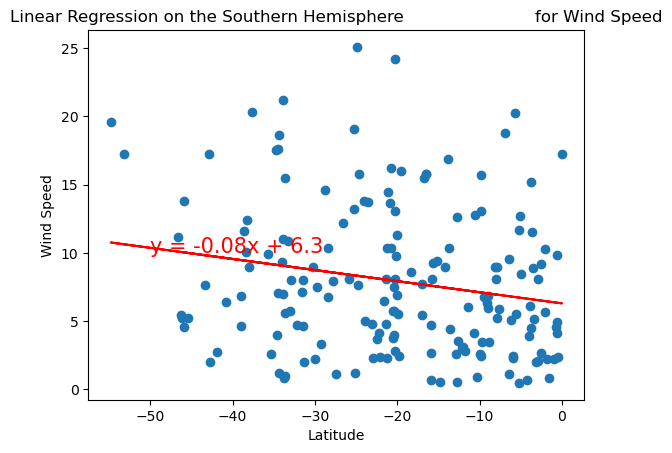

In [90]:
# Linear regression on the Southern Hemisphere (WIND SPEED)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,10))

In [ ]:
# FINDING
      # The correlation between the latitude and wind speed is very low 
        # because the r-value is less  than –0.07 for the Northern Hemisphere 
        # and less than –0.3 for the Southern Hemisphere for the plots shown here. 
        # This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
        # Check the r-values for your plots. 